## Here we're going to use the Veron & Cetty Fe II to generate Fe II templates

They provide a list of many broad and narrow Fe II transitions with the wavelength and relative intensity of each. All we need to do is assign a profile shape to each transition

In [14]:
import numpy as np
from matplotlib import pyplot as plt
from pylab import rcParams
rcParams['figure.figsize'] = 15,8

In [10]:
narrow_profile=np.genfromtxt('./files/na_feii_template.csv',delimiter=',',skip_header=1,usecols=(1,2))
print(np.shape(narrow_profile))
broad_profile=np.genfromtxt('./files/br_feii_template.csv',delimiter=',',skip_header=1,usecols=(1,2))
print(np.shape(broad_profile))

num_broad_lines=np.shape(broad_profile)[0]
num_narrow_lines=np.shape(narrow_profile)[0]

(212, 2)
(100, 2)


In [11]:
def gaussian(wave,centroid,width,amp):
    return amp*np.exp(-np.power(wave - centroid, 2.) / (2 * np.power(width, 2.)))

In [12]:
# as an example let's generate a single Fe II profile from our transitions

broad_width=20
narrow_width=5

broad_amp=1
narrow_amp=1

wave=np.linspace(3700,7500,num=1000)

fe_ii=np.zeros(len(wave))

# create broad gaussians
for i in range(num_broad_lines):
    fe_ii+=gaussian(wave,broad_profile[i,0],broad_width,broad_amp*broad_profile[i,1])
    
# create narrow gaussians
for i in range(num_narrow_lines):
    fe_ii+=gaussian(wave,narrow_profile[i,0],narrow_width,narrow_amp*narrow_profile[i,1])


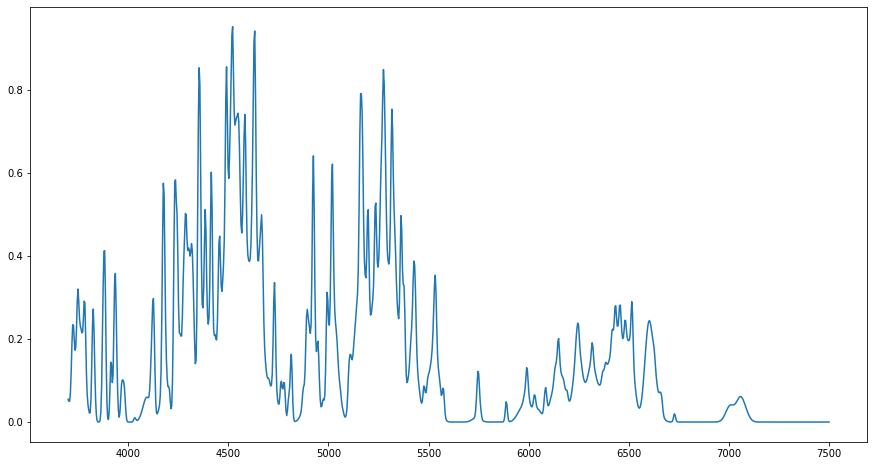

In [15]:
plt.plot(wave,fe_ii)

In [ ]:
# Now we can generate our slew of templates
# the model has two params related to Fe II, the width and the scale factor
# this means that for each template, we will need to decide the relative widths and the relative amplitudes 
# between the broad and narrow transitions